In [1]:
# Core scverse libraries
import importlib
import scanpy as sc
import anndata as ad
import scanpy_clustering.clustering as cl
importlib.reload(cl)

<module 'scanpy_clustering.clustering' from 'C:\\Users\\sebas\\OneDrive - Danmarks Tekniske Universitet\\Dokumenter\\02122 - Software Projekt\\enhanced-scanpy-clustering\\scanpy_clustering\\clustering.py'>

In [18]:
adata = sc.read_h5ad('symsim_observed_counts_5000genes_5000cells_complex.h5ad')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
cl.cluster(adata, algorithm='DBScan_Base', key_added='dbscan_labels_E', eps=1700, min_samples=100, metric='euclidean') #5.5 s
cl.cluster(adata, algorithm="KMeans", key_added="kmeans_lable", eps=1700, min_samples=100, metric='euclidean') #3.1 s
cl.cluster(adata, algorithm='DBScan_Base', key_added='dbscan_labels_C', eps=0.065, min_samples=40, metric='cosine') #2.9 s

C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scanpy\tools\_utils.py:40: UserWarning: You’re trying to run this on 5000 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


ARI for dbscan_labels_E -> 0.13604542607205602
ARI for kmeans_lable -> 0.3613040474059819
ARI for dbscan_labels_C -> 0.2092393613786885


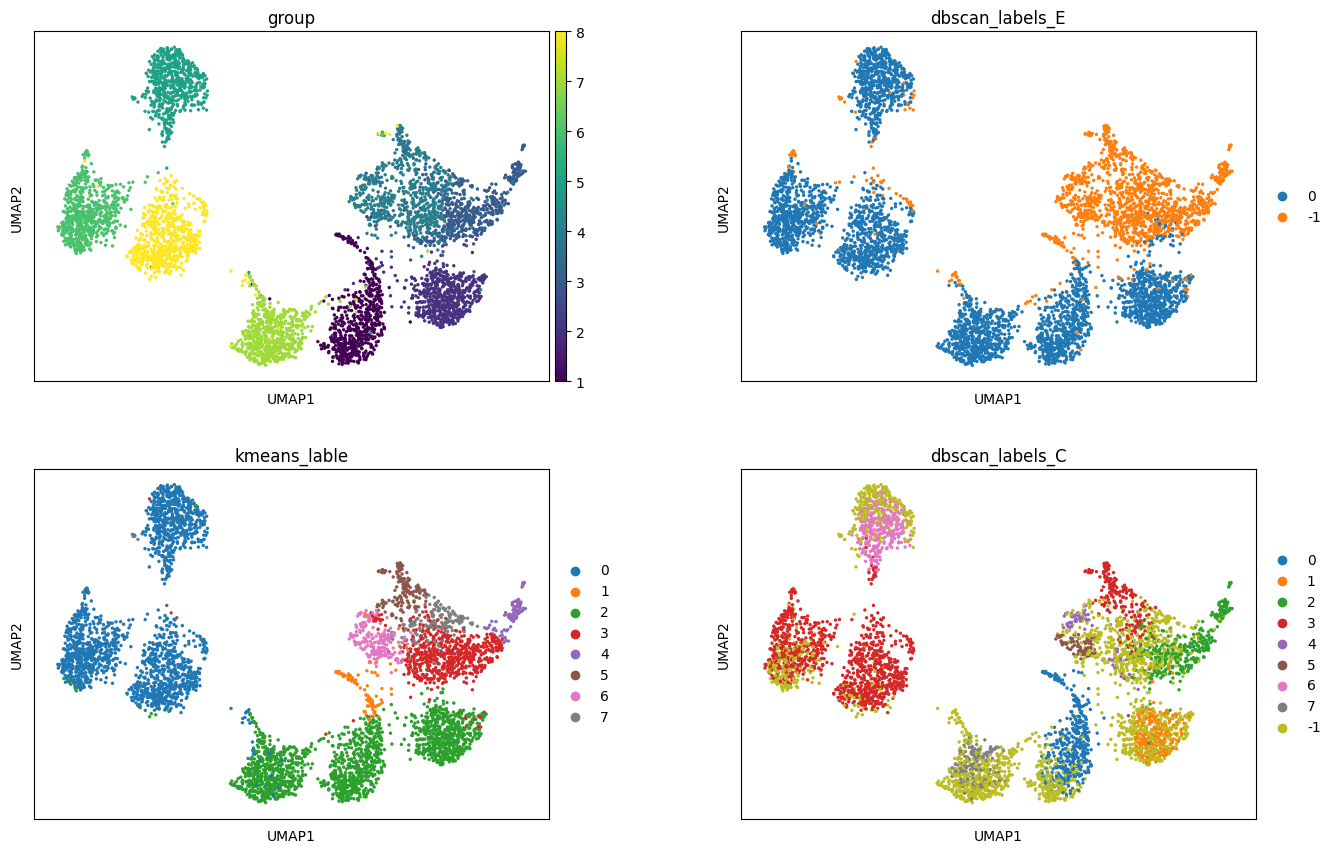

In [19]:
from sklearn.metrics.cluster import adjusted_rand_score
print("ARI for dbscan_labels_E ->", adjusted_rand_score(adata.obs['group'], adata.obs['dbscan_labels_E']))
print("ARI for kmeans_lable ->", adjusted_rand_score(adata.obs['group'], adata.obs['kmeans_lable']))
print("ARI for dbscan_labels_C ->", adjusted_rand_score(adata.obs['group'], adata.obs['dbscan_labels_C']))

sc.pl.umap(
    adata,
    color=["group", "dbscan_labels_E", "kmeans_lable", "dbscan_labels_C"],
    wspace=0.25,
    ncols=2,
)